In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

%matplotlib inline

In [2]:
data = datasets.load_digits()

0


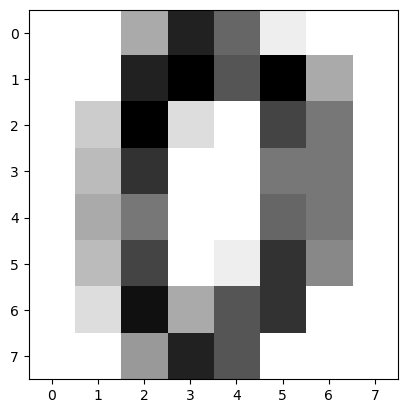

In [3]:
print(data.target[0])
plt.imshow(data.images[0], cmap=plt.cm.gray_r)

In [4]:
X = data.images.reshape(len(data.images), -1)
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [5]:
X.shape

(1797, 64)

In [6]:
y = data.target
y.shape

(1797,)

In [7]:
from sklearn.ensemble import RandomForestClassifier

In [8]:
rf_classifier = RandomForestClassifier(n_estimators=1000, bootstrap=True, oob_score=True)

In [9]:
rf_classifier.fit(X[:1000], y[:1000])

RandomForestClassifier(n_estimators=1000, oob_score=True)

In [10]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Predicted Labels
pred = rf_classifier.predict(X[1000:])

# Expectec labels
test_labels = y[1000:]

In [13]:
print(classification_report(pred, test_labels))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        79
           1       0.89      0.95      0.92        75
           2       0.90      1.00      0.95        69
           3       0.84      0.92      0.87        72
           4       0.95      0.98      0.96        81
           5       0.96      0.89      0.92        89
           6       1.00      0.98      0.99        82
           7       1.00      0.92      0.96        87
           8       0.89      0.91      0.90        75
           9       0.93      0.85      0.89        88

    accuracy                           0.93       797
   macro avg       0.93      0.94      0.93       797
weighted avg       0.94      0.93      0.93       797



In [14]:
print(confusion_matrix(pred, test_labels))

[[78  0  1  0  0  0  0  0  0  0]
 [ 0 71  1  1  0  0  0  0  2  0]
 [ 0  0 69  0  0  0  0  0  0  0]
 [ 0  2  3 66  0  0  0  0  0  1]
 [ 1  0  0  0 79  0  0  0  1  0]
 [ 0  1  0  3  0 79  0  0  3  3]
 [ 0  0  0  0  0  2 80  0  0  0]
 [ 0  0  0  4  2  0  0 80  1  0]
 [ 0  0  0  5  0  0  0  0 68  2]
 [ 0  6  3  0  2  1  0  0  1 75]]


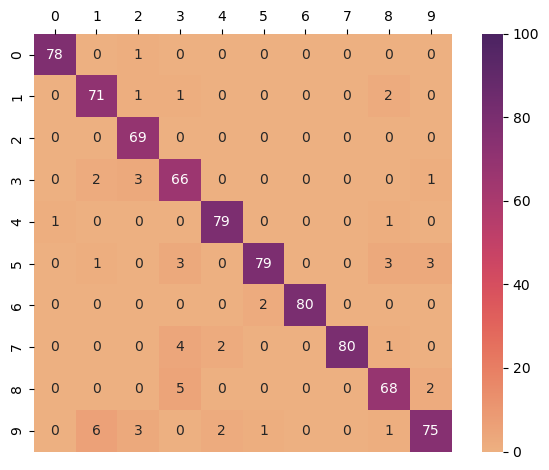

In [15]:
ax = sns.heatmap(confusion_matrix(pred, test_labels), square=True, fmt='d' ,annot=True, cmap='flare', vmax=100)
ax.xaxis.tick_top()
plt.tight_layout()